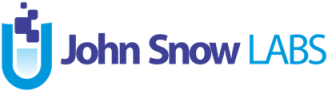

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/LogiQA_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [6]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## LogiQA
[LogiQA](https://paperswithcode.com/dataset/logiqa)

**Dataset Summary**

LogiQA consists of QA instances, covering multiple types of deductive reasoning. Results show that state-of-the-art neural models perform by far worse than human ceiling. The dataset can also serve as a benchmark for reinvestigating logical AI under the deep learning NLP setting.

**Data Splits**

- `test` :	Testing set from the LogiQA dataset, containing 1k question and answer examples.
- `test-tiny` : Truncated version of LogiQA dataset which contains 50 question answer examples

### Setup and Configure Harness

In [7]:
harness = Harness(
                  task="question-answering",
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"},
                  data={"data_source" :"LogiQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, lowercase. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [8]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'lowercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

### Generating the test cases.

In [9]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4712.70it/s]


In [10]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,options
0,robustness,uppercase,In the planning of a new district in a townshi...,"Based on the above statement, which of the fol...",IN THE PLANNING OF A NEW DISTRICT IN A TOWNSHI...,"BASED ON THE ABOVE STATEMENT, WHICH OF THE FOL...",A. Civic Park is north of the administrative s...
1,robustness,uppercase,The company sent three young staff members to ...,So what are the three young people on business?\n,THE COMPANY SENT THREE YOUNG STAFF MEMBERS TO ...,SO WHAT ARE THE THREE YOUNG PEOPLE ON BUSINESS?,"A. 0-year-old accountant, 20-year-old salesper..."
2,robustness,uppercase,"In a traditional Chinese medicine preparation,...","According to the above statement, which of the...","IN A TRADITIONAL CHINESE MEDICINE PREPARATION,...","ACCORDING TO THE ABOVE STATEMENT, WHICH OF THE...",A. o dangshen.\nB. o Shouwu.\nC. 白 术.\nD. 白 术.
3,robustness,uppercase,"In recent years, graduate entrance examination...",Which of the following can best strengthen the...,"IN RECENT YEARS, GRADUATE ENTRANCE EXAMINATION...",WHICH OF THE FOLLOWING CAN BEST STRENGTHEN THE...,"A. If you take an English tutoring class, you ..."
4,robustness,uppercase,A unit conducted the year-end assessment and a...,"According to the above statement, it can be co...",A UNIT CONDUCTED THE YEAR-END ASSESSMENT AND A...,"ACCORDING TO THE ABOVE STATEMENT, IT CAN BE CO...",A. A.\nB. B.\nC. C.\nD. Ding.
...,...,...,...,...,...,...,...
95,robustness,lowercase,"Recently, discussions on whether to gradually ...","Which of the following, if true, best supports...","recently, discussions on whether to gradually ...","which of the following, if true, best supports...",A. Many people now find a second career after ...
96,robustness,lowercase,A certain online forum made a statistical comp...,"Which of the following, if true, would weaken ...",a certain online forum made a statistical comp...,"which of the following, if true, would weaken ...","A. ""Good things don't go out, bad things sprea..."
97,robustness,lowercase,"On November 17, 2012, the ""Tianhe No.1"" superc...",Which of the following is most suitable as a c...,"on november 17, 2012, the ""tianhe no.1"" superc...",which of the following is most suitable as a c...,A. Only the United States and China can make s...
98,robustness,lowercase,With the help of animal fossils and DNA retain...,"Which of the following, if true, would best re...",with the help of animal fossils and dna retain...,"which of the following, if true, would best re...","A. If you invest a lot of time, energy and cos..."


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [11]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [12]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,options,expected_result,actual_result,pass
0,robustness,uppercase,In the planning of a new district in a townshi...,"Based on the above statement, which of the fol...",IN THE PLANNING OF A NEW DISTRICT IN A TOWNSHI...,"BASED ON THE ABOVE STATEMENT, WHICH OF THE FOL...",A. Civic Park is north of the administrative s...,B. The leisure area is southwest of the cultu...,B. The leisure area is southwest of the cultu...,True
1,robustness,uppercase,The company sent three young staff members to ...,So what are the three young people on business?\n,THE COMPANY SENT THREE YOUNG STAFF MEMBERS TO ...,SO WHAT ARE THE THREE YOUNG PEOPLE ON BUSINESS?,"A. 0-year-old accountant, 20-year-old salesper...","C. 4-year-old accountant, 20-year-old salespe...","D. 0-year-old accountant, 20-year-old account...",False
2,robustness,uppercase,"In a traditional Chinese medicine preparation,...","According to the above statement, which of the...","IN A TRADITIONAL CHINESE MEDICINE PREPARATION,...","ACCORDING TO THE ABOVE STATEMENT, WHICH OF THE...",A. o dangshen.\nB. o Shouwu.\nC. 白 术.\nD. 白 术.,B. Shouwu.,A. o dangshen.,False
3,robustness,uppercase,"In recent years, graduate entrance examination...",Which of the following can best strengthen the...,"IN RECENT YEARS, GRADUATE ENTRANCE EXAMINATION...",WHICH OF THE FOLLOWING CAN BEST STRENGTHEN THE...,"A. If you take an English tutoring class, you ...",B. Only those who intend to take the graduate...,"A. If you take an English tutoring class, you...",False
4,robustness,uppercase,A unit conducted the year-end assessment and a...,"According to the above statement, it can be co...",A UNIT CONDUCTED THE YEAR-END ASSESSMENT AND A...,"ACCORDING TO THE ABOVE STATEMENT, IT CAN BE CO...",A. A.\nB. B.\nC. C.\nD. Ding.,D. Ding.,Ding.,True
...,...,...,...,...,...,...,...,...,...,...
95,robustness,lowercase,"Recently, discussions on whether to gradually ...","Which of the following, if true, best supports...","recently, discussions on whether to gradually ...","which of the following, if true, best supports...",A. Many people now find a second career after ...,C. The employment problem of young people sho...,C. The employment problem of young people sho...,True
96,robustness,lowercase,A certain online forum made a statistical comp...,"Which of the following, if true, would weaken ...",a certain online forum made a statistical comp...,"which of the following, if true, would weaken ...","A. ""Good things don't go out, bad things sprea...",B. The number of Internet users has quadruple...,B. The number of Internet users has quadruple...,True
97,robustness,lowercase,"On November 17, 2012, the ""Tianhe No.1"" superc...",Which of the following is most suitable as a c...,"on november 17, 2012, the ""tianhe no.1"" superc...",which of the following is most suitable as a c...,A. Only the United States and China can make s...,"D. China's ""Tianhe 2"" computing speed is clea...","D. China's ""Tianhe 2"" computing speed is clea...",True
98,robustness,lowercase,With the help of animal fossils and DNA retain...,"Which of the following, if true, would best re...",with the help of animal fossils and dna retain...,"which of the following, if true, would best re...","A. If you invest a lot of time, energy and cos...",D. The vast majority of these animals gradual...,D. The vast majority of these animals gradual...,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [13]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,16,34,68%,66%,True
1,robustness,lowercase,9,41,82%,60%,True


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [14]:
harness = Harness(
                  task="question-answering",
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"},
                  data={"data_source" :"LogiQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [15]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [16]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1080.73it/s]


In [17]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rouge1_score,male
1,fairness,min_gender_rouge1_score,female
2,fairness,min_gender_rouge1_score,unknown
3,fairness,min_gender_rouge2_score,male
4,fairness,min_gender_rouge2_score,female
5,fairness,min_gender_rouge2_score,unknown
6,fairness,min_gender_rougeL_score,male
7,fairness,min_gender_rougeL_score,female
8,fairness,min_gender_rougeL_score,unknown
9,fairness,min_gender_rougeLsum_score,male


### Running the tests

In [18]:
harness.run()

Running testcases... :   0%|          | 0/24 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 24/24 [00:38<00:00,  1.29it/s]

### Generated Results

In [19]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.375000,False
1,fairness,min_gender_rouge1_score,female,0.66,1.000000,True
2,fairness,min_gender_rouge1_score,unknown,0.66,0.580650,False
3,fairness,min_gender_rouge2_score,male,0.60,0.350000,False
4,fairness,min_gender_rouge2_score,female,0.60,1.000000,True
5,fairness,min_gender_rouge2_score,unknown,0.60,0.440616,False
6,fairness,min_gender_rougeL_score,male,0.66,0.372685,False
7,fairness,min_gender_rougeL_score,female,0.66,1.000000,True
8,fairness,min_gender_rougeL_score,unknown,0.66,0.538201,False
9,fairness,min_gender_rougeLsum_score,male,0.66,0.372685,False


### Final Results

In [20]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,2,1,33%,65%,False
1,fairness,min_gender_rouge2_score,2,1,33%,65%,False
2,fairness,min_gender_rougeL_score,2,1,33%,65%,False
3,fairness,min_gender_rougeLsum_score,2,1,33%,65%,False
4,fairness,max_gender_rouge1_score,1,2,67%,65%,True
5,fairness,max_gender_rouge2_score,1,2,67%,65%,True
6,fairness,max_gender_rougeL_score,1,2,67%,65%,True
7,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [21]:
harness = Harness(
                  task="question-answering",
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"},
                  data={"data_source" :"LogiQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [22]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [23]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4922.89it/s]


In [24]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score
3,accuracy,min_bleu_score
4,accuracy,min_rouge2_score
5,accuracy,min_rougeLsum_score


### Running the tests

In [25]:
harness.run()

Running testcases... :   0%|          | 0/6 [00:00<?, ?it/s]

Running testcases... :  50%|█████     | 3/6 [00:20<00:14,  4.88s/it]

Running testcases... : 100%|██████████| 6/6 [00:24<00:00,  4.02s/it]


### Generated Results

In [26]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.320000,False
1,accuracy,min_rouge1_score,0.8,0.599507,False
2,accuracy,min_rougeL_score,0.8,0.562835,False
3,accuracy,min_bleu_score,0.8,0.511221,False
4,accuracy,min_rouge2_score,0.8,0.481923,False
5,accuracy,min_rougeLsum_score,0.8,0.566100,False


### Final Results

In [27]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_bleu_score,1,0,0%,65%,False
4,accuracy,min_rouge2_score,1,0,0%,65%,False
5,accuracy,min_rougeLsum_score,1,0,0%,65%,False
